# ***1. Importing Necessary Libraries***



In [1]:
!pip install category_encoders
import category_encoders as ce

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, precision_recall_curve
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import numpy as np
import joblib
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from sklearn.preprocessing import RobustScaler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.8 MB/s eta 0:00:00


# ***2. Loading and Inspecting the Dataset***


In [2]:
# loading the dataset to a pandas dataframe
diabetic_dataset = pd.read_csv('/content/diabetic_data.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
diabetic_dataset.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
# Verify the dimensions of the dataset
print("Dimensões do dataset:", diabetic_dataset.shape)

Dimensões do dataset: (101766, 50)


# ***3. Handling Missing Values***


## 3.1 Replacing '?' with NaN


In [6]:
# Replace '?' with NaN
diabetic_dataset.replace('?', np.nan, inplace=True)

# Check for missing values
missing_values = diabetic_dataset.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])


Valores ausentes por coluna:
race                  2273
weight               98569
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2                 358
diag_3                1423
max_glu_serum        96420
A1Cresult            84748
dtype: int64


In [7]:
# Calculate the percentage of missing values
missing_percent = diabetic_dataset.isnull().mean() * 100
print("\nPercentage of missing values per column:")
print(missing_percent[missing_percent > 0])


Porcentagem de valores ausentes por coluna:
race                  2.233555
weight               96.858479
payer_code           39.557416
medical_specialty    49.082208
diag_1                0.020636
diag_2                0.351787
diag_3                1.398306
max_glu_serum        94.746772
A1Cresult            83.277322
dtype: float64


## 3.2 Remove Columns with Many Missing Values


In [8]:
# Remove columns with many missing values
diabetic_dataset.drop(columns=['weight', 'payer_code', 'medical_specialty'], inplace=True)

# Check dimensions after removal
print("\nDataset dimensions after removing columns with many missing values:", diabetic_dataset.shape)


Dimensões do dataset após remover colunas com muitos valores ausentes: (101766, 47)


In [9]:
# Impute missing values in 'max_glu_serum' and 'A1Cresult' with 'None'
diabetic_dataset['max_glu_serum'].fillna('None', inplace=True)
diabetic_dataset['A1Cresult'].fillna('None', inplace=True)

# Check counts after imputation
print("\nCounts in 'max_glu_serum' after imputation:")
print(diabetic_dataset['max_glu_serum'].value_counts())

print("\nCounts in 'A1Cresult' after imputation:")
print(diabetic_dataset['A1Cresult'].value_counts())


Contagens em 'max_glu_serum' após imputação:
max_glu_serum
None    96420
Norm     2597
>200     1485
>300     1264
Name: count, dtype: int64

Contagens em 'A1Cresult' após imputação:
A1Cresult
None    84748
>8       8216
Norm     4990
>7       3812
Name: count, dtype: int64


## 3.3 Imputing Missing Values


In [10]:
# Replace missing values with 'unknown' in columns 'diag_1', 'diag_2', and 'diag_3'
for col in ['diag_1', 'diag_2', 'diag_3']:
    diabetic_dataset[col].fillna('unknown', inplace=True)

# Check if there are still missing values
missing_values = diabetic_dataset.isnull().sum()
print("\nMissing values after imputation:")
print(missing_values[missing_values > 0])


Valores ausentes após imputação:
race    2273
dtype: int64


In [11]:
# Check missing values in 'race'
print("\nMissing values in 'race':", diabetic_dataset['race'].isnull().sum())

# Replace missing values in 'race' with 'unknown'
diabetic_dataset['race'].fillna('unknown', inplace=True)


Valores ausentes em 'race': 2273


# ***4. Removing Duplicates and Irrelevant Columns***

In [12]:
# Check if there are duplicates
has_duplicates = diabetic_dataset.duplicated().any()
print(f"\nAre there duplicates: {has_duplicates}")

# Remove irrelevant columns
diabetic_dataset.drop(columns=['encounter_id', 'patient_nbr'], inplace=True)

# Check dimensions after removal
print("Dimensões do dataset após remover colunas irrelevantes:", diabetic_dataset.shape)


Existem duplicatas: False
Dimensões do dataset após remover colunas irrelevantes: (101766, 45)


# ***5. Mapping ICD-9 Codes***


In [13]:
# Function to map ICD-9 codes
def map_icd9(code):
    code = str(code)
    if code == 'unknown':
        return 'unknown'
    elif code.startswith('V') or code.startswith('E'):
        return 'Supplementary Classification'
    else:
        try:
            code = float(code)
            if code >= 1 and code < 140:
                return 'Infectious and Parasitic Diseases'
            elif code >= 140 and code < 240:
                return 'Neoplasms'
            elif code >= 240 and code < 280:
                return 'Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders'
            elif code >= 280 and code < 290:
                return 'Diseases of the Blood and Blood-forming Organs'
            elif code >= 290 and code < 320:
                return 'Mental Disorders'
            elif code >= 320 and code < 390:
                return 'Diseases of the Nervous System and Sense Organs'
            elif code >= 390 and code < 460:
                return 'Diseases of the Circulatory System'
            elif code >= 460 and code < 520:
                return 'Diseases of the Respiratory System'
            elif code >= 520 and code < 580:
                return 'Diseases of the Digestive System'
            elif code >= 580 and code < 630:
                return 'Diseases of the Genitourinary System'
            elif code >= 630 and code < 680:
                return 'Complications of Pregnancy, Childbirth, and the Puerperium'
            elif code >= 680 and code < 710:
                return 'Diseases of the Skin and Subcutaneous Tissue'
            elif code >= 710 and code < 740:
                return 'Diseases of the Musculoskeletal System and Connective Tissue'
            elif code >= 740 and code < 760:
                return 'Congenital Anomalies'
            elif code >= 760 and code < 780:
                return 'Certain Conditions Originating in the Perinatal Period'
            elif code >= 780 and code < 800:
                return 'Symptoms, Signs, and Ill-defined Conditions'
            elif code >= 800 and code < 1000:
                return 'Injury and Poisoning'
            else:
                return 'Other'
        except ValueError:
            return 'unknown'

# Apply the mapping to 'diag_1', 'diag_2', and 'diag_3'
for col in ['diag_1', 'diag_2', 'diag_3']:
    diabetic_dataset[col] = diabetic_dataset[col].apply(map_icd9)

# Check counts after mapping
for col in ['diag_1', 'diag_2', 'diag_3']:
    print(f"\nCategory counts in {col}:")
    print(diabetic_dataset[col].value_counts())


Contagens de categorias em diag_1:
diag_1
Diseases of the Circulatory System                                       30336
Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders    11459
Diseases of the Respiratory System                                       10407
Diseases of the Digestive System                                          9208
Symptoms, Signs, and Ill-defined Conditions                               7636
Injury and Poisoning                                                      6974
Diseases of the Genitourinary System                                      5078
Diseases of the Musculoskeletal System and Connective Tissue              4957
Neoplasms                                                                 3433
Infectious and Parasitic Diseases                                         2768
Diseases of the Skin and Subcutaneous Tissue                              2530
Mental Disorders                                                          2262
Supplemen

In [14]:
# Check the number of columns and presence of any missing values
print("Dataset dimensions (rows, columns):", diabetic_dataset.shape)
missing_values = diabetic_dataset.isnull().sum()
print(missing_values[missing_values > 0])

Dataset dimensions (rows, columns): (101766, 45)
Series([], dtype: int64)


# ***6. Descriptive Statistics***


## 6.1 Distribution of the Target Variable



Distribuição de 'readmitted':
readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


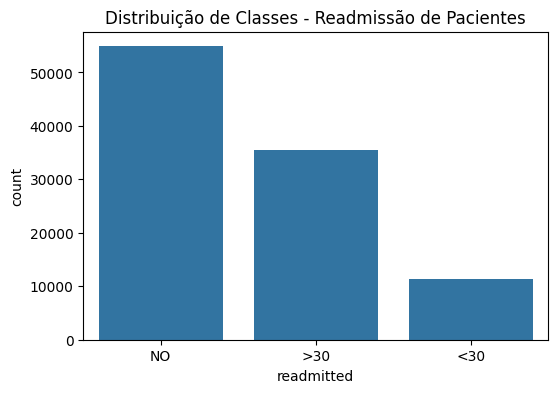

In [15]:
# Check the distribution of the target variable 'readmitted'
print("\nDistribution of 'readmitted':")
print(diabetic_dataset['readmitted'].value_counts())

# Visualize the distribution
plt.figure(figsize=(6,4))
sns.countplot(x='readmitted', data=diabetic_dataset)
plt.title('Class Distribution - Patient Readmission')
plt.show()

## 6.2 Transforming the Target Variable



Distribuição de 'readmitted' após a transformação:
readmitted
0    90409
1    11357
Name: count, dtype: int64


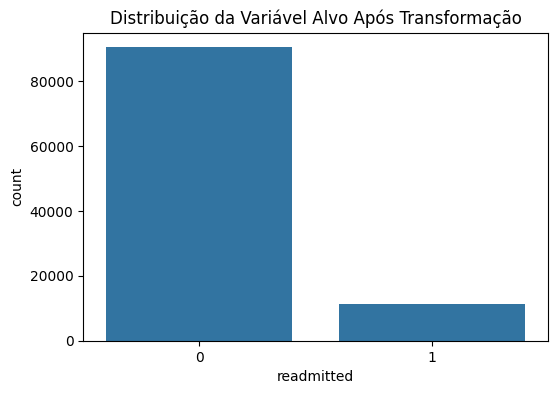

In [16]:
# Transform 'readmitted' into 1 for readmissions in ≤30 days, 0 otherwise
diabetic_dataset['readmitted'] = diabetic_dataset['readmitted'].replace({'NO': 0, '>30': 0, '<30': 1})

# Check the distribution after transformation
print("\nDistribution of 'readmitted' after transformation:")
print(diabetic_dataset['readmitted'].value_counts())

# Visualize the new distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='readmitted', data=diabetic_dataset)
plt.title('Target Variable Distribution After Transformation')
plt.show()

Class distribution:
 readmitted
0    0.888401
1    0.111599
Name: proportion, dtype: float64
Class distribution:
 readmitted
0    90409
1    11357
Name: count, dtype: int64


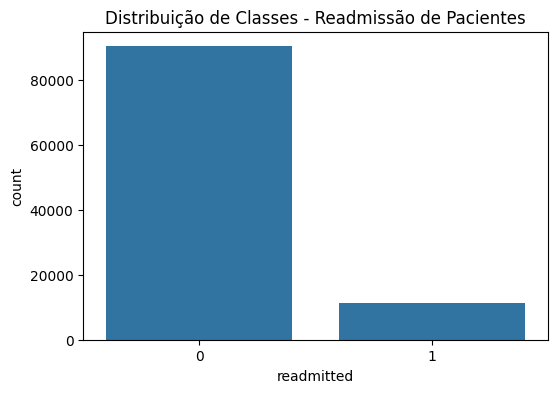

In [17]:
# Check the distribution of labels
print("Class distribution:\n", diabetic_dataset['readmitted'].value_counts(normalize=True))

print("Class distribution:\n", diabetic_dataset['readmitted'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='readmitted', data=diabetic_dataset)
plt.title('Class Distribution - Patient Readmission')
plt.show()

# ***7. Encoding Categorical Variables***

## 7.1 Variable 'age'

Explanation:
Map the age intervals to numerical values representing the average age of each interval.
This allows the model to interpret age as a continuous numerical variable.


In [18]:
# Map age intervals to numerical values (average age)
age_mapping = {
    '[0-10)': 5,
    '[10-20)': 15,
    '[20-30)': 25,
    '[30-40)': 35,
    '[40-50)': 45,
    '[50-60)': 55,
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95
}
diabetic_dataset['age'] = diabetic_dataset['age'].map(age_mapping)

# Check unique values in 'age' after mapping
print("\nUnique values in 'age' after mapping:")
print(diabetic_dataset['age'].unique())


Valores únicos em 'age' após o mapeamento:
[ 5 15 25 35 45 55 65 75 85 95]


## 7.2 Nominal Categorical Variables

Explanation:
List the categorical columns to apply One-Hot Encoding.
Verify that all columns are present in the dataset.

In [19]:
# List of categorical columns
categorical_cols = ['race', 'gender', 'max_glu_serum', 'A1Cresult',
                    'metformin', 'repaglinide', 'nateglinide',
                    'chlorpropamide', 'glimepiride', 'acetohexamide',
                    'glipizide', 'glyburide', 'tolbutamide',
                    'pioglitazone', 'rosiglitazone', 'acarbose',
                    'miglitol', 'troglitazone', 'tolazamide',
                    'examide', 'citoglipton', 'insulin',
                    'glyburide-metformin', 'glipizide-metformin',
                    'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                    'metformin-pioglitazone', 'change', 'diabetesMed',
                    'diag_1', 'diag_2', 'diag_3',
                    'admission_type_id', 'discharge_disposition_id', 'admission_source_id']

# Verify that all columns are present in the dataset
missing_cols = [col for col in categorical_cols if col not in diabetic_dataset.columns]
print("\nMissing categorical columns in the dataset:", missing_cols)


Colunas categóricas ausentes no dataset: []


Explicação:

Aplicamos One-Hot Encoding nas colunas categóricas, usando drop_first=True para evitar a armadilha da multicolinearidade.
O dataset agora tem mais colunas devido às novas variáveis binárias criadas.


In [20]:
# Apply One-Hot Encoding
diabetic_dataset = pd.get_dummies(diabetic_dataset, columns=categorical_cols, drop_first=True)

# Check dimensions after encoding
print("\nDataset dimensions after One-Hot Encoding:", diabetic_dataset.shape)


Dimensões do dataset após One-Hot Encoding: (101766, 172)


# ***8. Balancing the Classes***

## 8.1 Checking the Class Distribution




In [21]:
# Confirm that the positive class (1) represents about 11% of the data, indicating significant imbalance
class_distribution = diabetic_dataset['readmitted'].value_counts(normalize=True)
print("\nClass distribution after transformation:")
print(class_distribution)


Distribuição das classes após transformação:
readmitted
0    0.888401
1    0.111599
Name: proportion, dtype: float64


## 8.2 Separating Features and Target


In [22]:
# Separate features and target variable
X = diabetic_dataset.drop('readmitted', axis=1)
y = diabetic_dataset['readmitted']

## 8.3 Applying SMOTE for Balancing


In [23]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new distribution
print("\nClass distribution after SMOTE:")
print(y_resampled.value_counts())


Distribuição das classes após SMOTE:
readmitted
0    90409
1    90409
Name: count, dtype: int64


# ***9. Splitting the Data into Training and Test Sets***




In [24]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Check the dimensions of the sets
print("\nTraining set dimensions:", X_train.shape)
print("Test set dimensions:", X_test.shape)

# Display the shapes of the resampled sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Dimensões do conjunto de treino: (144654, 171)
Dimensões do conjunto de teste: (36164, 171)


# ***10. Scaling Numerical Variables***

We use RobustScaler to scale numerical variables, making them less sensitive to outliers.
We fit on the training data and transform both training and test data.


In [25]:
# Identify numerical columns
numerical_cols = ['age', 'time_in_hospital', 'num_lab_procedures',
                  'num_procedures', 'num_medications', 'number_outpatient',
                  'number_emergency', 'number_inpatient', 'number_diagnoses']

# Apply RobustScaler to numerical columns
scaler = RobustScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Check the scaled data
print("\nPreview of numerical columns after scaling:")
print(X_train[numerical_cols].head())


Visualização das colunas numéricas após escalonamento:
        age  time_in_hospital  num_lab_procedures  num_procedures  \
169517  1.0              0.00               -1.12             0.0   
161073 -1.5             -0.75               -0.32             0.0   
64776   0.5              1.00                1.04             0.0   
10170  -2.0             -0.25                0.08             0.5   
166367  0.5              0.50               -0.16             0.5   

        num_medications  number_outpatient  number_emergency  \
169517         0.555556                0.0               0.0   
161073        -0.333333                0.0               0.0   
64776          1.555556                0.0               0.0   
10170         -0.777778                0.0               0.0   
166367        -0.333333                0.0               0.0   

        number_inpatient  number_diagnoses  
169517               1.0          0.333333  
161073               0.0         -1.666667  
64776    

In [26]:
diabetic_dataset.head(5)

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_unknown,gender_Male,gender_Unknown/Invalid,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,diag_1_Congenital Anomalies,diag_1_Diseases of the Blood and Blood-forming Organs,diag_1_Diseases of the Circulatory System,diag_1_Diseases of the Digestive System,diag_1_Diseases of the Genitourinary System,diag_1_Diseases of the Musculoskeletal System and Connective Tissue,diag_1_Diseases of the Nervous System and Sense Organs,diag_1_Diseases of the Respiratory System,diag_1_Diseases of the Skin and Subcutaneous Tissue,"diag_1_Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders",diag_1_Infectious and Parasitic Diseases,diag_1_Injury and Poisoning,diag_1_Mental Disorders,diag_1_Neoplasms,diag_1_Supplementary Classification,"diag_1_Symptoms, Signs, and Ill-defined Conditions",diag_1_unknown,diag_2_Congenital Anomalies,diag_2_Diseases of the Blood and Blood-forming Organs,diag_2_Diseases of the Circulatory System,diag_2_Diseases of the Digestive System,diag_2_Diseases of the Genitourinary System,diag_2_Diseases of the Musculoskeletal System and Connective Tissue,diag_2_Diseases of the Nervous System and Sense Organs,diag_2_Diseases of the Respiratory System,diag_2_Diseases of the Skin and Subcutaneous Tissue,"diag_2_Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders",diag_2_Infectious and Parasitic Diseases,diag_2_Injury and Poisoning,diag_2_Mental Disorders,diag_2_Neoplasms,diag_2_Supplementary Classification,"diag_2_Symptoms, Signs, and Ill-defined Conditions",diag_2_unknown,diag_3_Congenital Anomalies,diag_3_Diseases of the Blood and Blood-forming Organs,diag_3_Diseases of the Circulatory System,diag_3_Diseases of the Digestive System,diag_3_Diseases of the Genitourinary System,diag_3_Diseases of the Musculoskeletal System and Connective Tissue,diag_3_Diseases of the Nervous System and Sense Organs,diag_3_Diseases of the Respiratory System,diag_3_Diseases of the Skin and Subcutaneous Tissue,"diag_3_Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders",diag_3_Infectious and Parasitic Diseases,diag_3_Injury and Poisoning,diag_3_Mental Disorders,diag_3_Neoplasms,diag_3_Supplementary Classification,"diag_3_Symptoms, Signs, and Ill-defined Conditions",diag_3_unknown,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_8,discharge_disposition_id_9,discharge_disposition_id_10,discharge_disposition_id_11,discharge_disposition_id_12,discharge_disposition_id_13,discharge_disposition_id_14,discharge_disposition_id_15,discharge_disposition_id_16,discharge_disposition_id_17,discharge_disposition_id_18,discharge_disposit

In [27]:
# Check the number of columns and presence of any missing values
print("Dataset dimensions (rows, columns):", diabetic_dataset.shape)
missing_values = diabetic_dataset.isnull().sum()
print(missing_values[missing_values > 0])

Dataset dimensions (rows, columns): (101766, 172)
Series([], dtype: int64)


# ***11. Defining Models and Hyperparameters***


In [30]:
# Define the models and their hyperparameters
models = {
     'LogisticRegression': (LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear']}),
    # 'SVC': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}),
    # 'KNeighborsClassifier': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}),
     'RandomForestClassifier': (RandomForestClassifier(), {'n_estimators': [50, 100], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'criterion': ['gini', 'entropy']}),
     'GradientBoostingClassifier': (GradientBoostingClassifier(), {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5], 'subsample': [0.8, 1.0]}),
    # 'AdaBoostClassifier': (AdaBoostClassifier(), {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1.0]}),
     'ExtraTreesClassifier': (ExtraTreesClassifier(), {'n_estimators': [50, 100], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'criterion': ['gini', 'entropy']}),
     'XGBClassifier': (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 6, 10], 'subsample': [0.8, 1.0], 'colsample_bytree': [0.8, 1.0]})
}


# ***12. Function to Compare Models***




In [31]:
# Variables to track the best model
best_model = None
best_score = 0
best_model_name = ""
best_params = {}

# Function to compare models
def compare_models(X_train, y_train, X_test, y_test):
    global best_model, best_score, best_model_name, best_params

    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for model_name, (model, params) in models.items():
        print(f"Evaluating {model_name}...")

        random_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=params,
            cv=stratified_kfold,
            scoring='roc_auc',
            n_iter=10,
            random_state=42,
            n_jobs=-1
        )
        random_search.fit(X_train, y_train)

        current_best_params = random_search.best_params_
        current_best_score = random_search.best_score_
        print(f"Best parameters for {model_name}: {current_best_params}")
        print(f"Best AUC-ROC in cross-validation for {model_name}: {current_best_score}")

        best_model_instance = random_search.best_estimator_

        # Predictions and metrics on the test set
        y_proba = best_model_instance.predict_proba(X_test)[:, 1]
        y_pred = best_model_instance.predict(X_test)
        accuracy_test = accuracy_score(y_test, y_pred)
        auc_test = roc_auc_score(y_test, y_proba)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f"Performance on the test set for {model_name}:")
        print(f"Accuracy: {accuracy_test}")
        print(f"AUC-ROC: {auc_test}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1-Score: {f1}\n")

        # Adjust the decision threshold to improve recall
        thresholds = [0.5, 0.4, 0.3]  # Example thresholds to test
        for threshold in thresholds:
            y_pred_adjusted = (y_proba >= threshold).astype(int)
            precision_adj = precision_score(y_test, y_pred_adjusted)
            recall_adj = recall_score(y_test, y_pred_adjusted)
            f1_adj = f1_score(y_test, y_pred_adjusted)
            print(f"Adjusted threshold: {threshold}")
            print(f"Adjusted Precision: {precision_adj}")
            print(f"Adjusted Recall: {recall_adj}")
            print(f"Adjusted F1-Score: {f1_adj}\n")


        # Plot the Precision-Recall Curve
        precision_curve, recall_curve, thresholds_curve = precision_recall_curve(y_test, y_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(recall_curve, precision_curve, marker='.', label=model_name)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve - {model_name}')
        plt.legend()
        plt.show()

        # Update the best model based on AUC-ROC on the test set
        if auc_test > best_score:
            best_score = auc_test
            best_model = best_model_instance
            best_model_name = model_name
            best_params = current_best_params

    print(f"\nThe best model is: {best_model_name} with AUC-ROC of {best_score} on the test set")
    print(f"Best hyperparameters: {best_params}")

# ***13. Running Model Comparison***


Avaliando LogisticRegression...
Melhores parâmetros para LogisticRegression: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
Melhor AUC-ROC na validação cruzada para LogisticRegression: 0.9519932051585542
Desempenho no conjunto de teste para LogisticRegression:
Acurácia: 0.9276352173432142
AUC-ROC: 0.9505489215819182
Precisão: 0.9844014283029505
Recall: 0.8690410352837076
F1-Score: 0.9231311499485975

Limiar ajustado: 0.5
Precisão ajustada: 0.9844014283029505
Recall ajustado: 0.8690410352837076
F1-Score ajustado: 0.9231311499485975

Limiar ajustado: 0.4
Precisão ajustada: 0.9738513721862473
Recall ajustado: 0.8732994137816613
F1-Score ajustado: 0.9208385573082194

Limiar ajustado: 0.3
Precisão ajustada: 0.9485394729014218
Recall ajustado: 0.8817608671607123
F1-Score ajustado: 0.9139319595311112



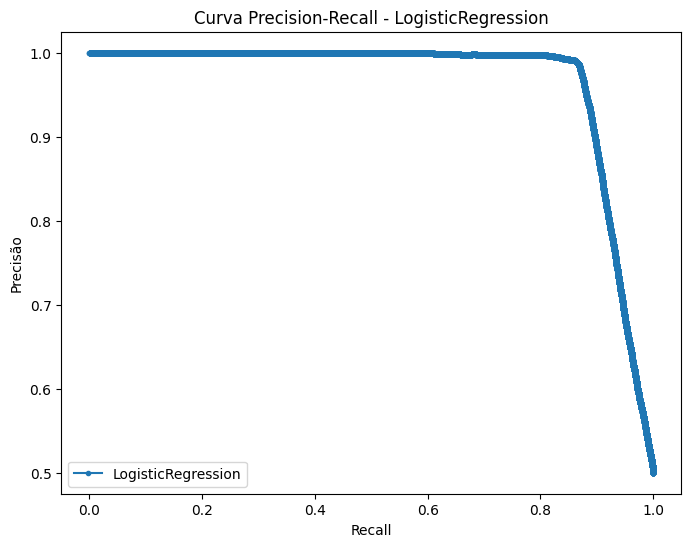

Avaliando RandomForestClassifier...
Melhores parâmetros para RandomForestClassifier: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}
Melhor AUC-ROC na validação cruzada para RandomForestClassifier: 0.958358871252997
Desempenho no conjunto de teste para RandomForestClassifier:
Acurácia: 0.9334697489215795
AUC-ROC: 0.9579202878220188
Precisão: 0.995448798988622
Recall: 0.87092135825683
F1-Score: 0.9290307356498142

Limiar ajustado: 0.5
Precisão ajustada: 0.9943224829674489
Recall ajustado: 0.8716956088928216
F1-Score ajustado: 0.9289797842871457

Limiar ajustado: 0.4
Precisão ajustada: 0.9766089033127181
Recall ajustado: 0.882037385244995
F1-Score ajustado: 0.9269171534013309

Limiar ajustado: 0.3
Precisão ajustada: 0.9089190391459074
Recall ajustado: 0.9039929211370423
F1-Score ajustado: 0.9064492874175123



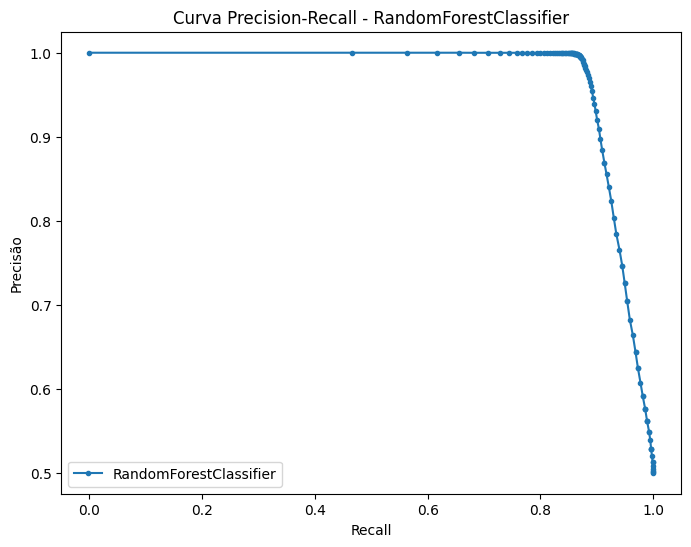

Avaliando GradientBoostingClassifier...
Melhores parâmetros para GradientBoostingClassifier: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Melhor AUC-ROC na validação cruzada para GradientBoostingClassifier: 0.9477078030660829
Desempenho no conjunto de teste para GradientBoostingClassifier:
Acurácia: 0.9218836411901339
AUC-ROC: 0.9452578209841558
Precisão: 0.9807171214317222
Recall: 0.8606901891383697
F1-Score: 0.9167918470737239

Limiar ajustado: 0.5
Precisão ajustada: 0.9807171214317222
Recall ajustado: 0.8606901891383697
F1-Score ajustado: 0.9167918470737239

Limiar ajustado: 0.4
Precisão ajustada: 0.9403832505322924
Recall ajustado: 0.8793275080190245
F1-Score ajustado: 0.9088310945984567

Limiar ajustado: 0.3
Precisão ajustada: 0.8561593441244482
Recall ajustado: 0.9009512222099325
F1-Score ajustado: 0.8779843707895446



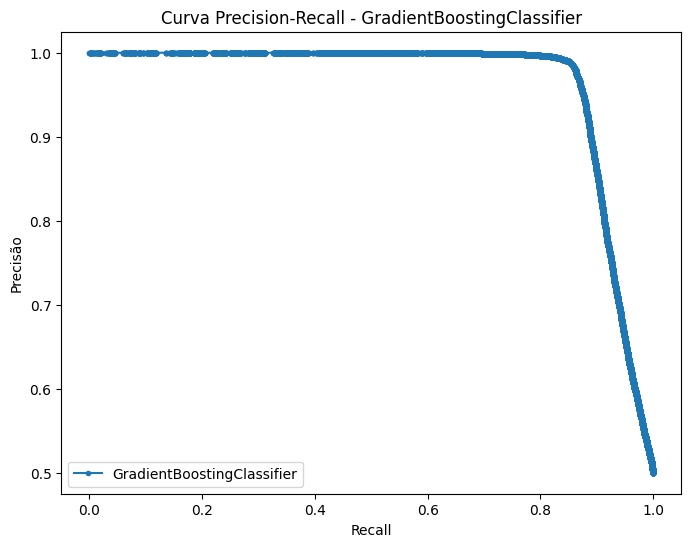

Avaliando ExtraTreesClassifier...
Melhores parâmetros para ExtraTreesClassifier: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}
Melhor AUC-ROC na validação cruzada para ExtraTreesClassifier: 0.953874894937702
Desempenho no conjunto de teste para ExtraTreesClassifier:
Acurácia: 0.9322530693507355
AUC-ROC: 0.9531749885346384
Precisão: 0.9913251194367614
Recall: 0.872138037827674
F1-Score: 0.9279199764636658

Limiar ajustado: 0.5
Precisão ajustada: 0.9905849861913131
Recall ajustado: 0.8728016812299524
F1-Score ajustado: 0.9279708355383077

Limiar ajustado: 0.4
Precisão ajustada: 0.971915257341718
Recall ajustado: 0.8803782767392988
F1-Score ajustado: 0.9238849714169641

Limiar ajustado: 0.3
Precisão ajustada: 0.9121769971288634
Recall ajustado: 0.8960845039265568
F1-Score ajustado: 0.9040591435346631



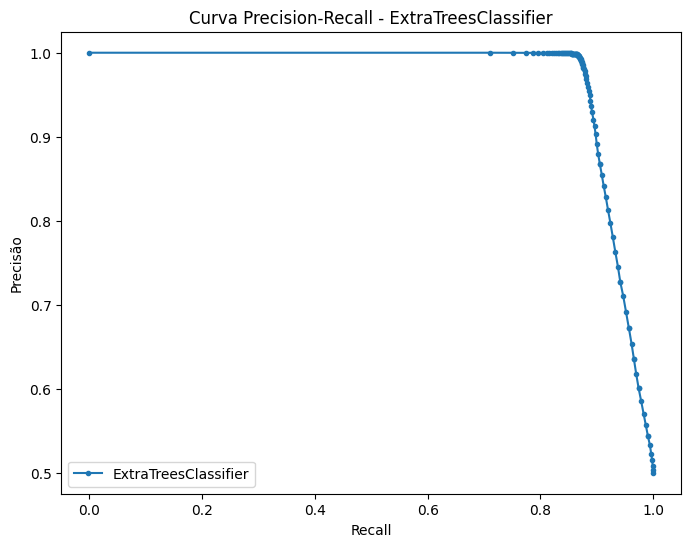

Avaliando XGBClassifier...
Melhores parâmetros para XGBClassifier: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Melhor AUC-ROC na validação cruzada para XGBClassifier: 0.9502243493507553
Desempenho no conjunto de teste para XGBClassifier:
Acurácia: 0.9248700365003871
AUC-ROC: 0.948543228043672
Precisão: 0.9854660347551343
Recall: 0.862459904877779
F1-Score: 0.9198690535877547

Limiar ajustado: 0.5
Precisão ajustada: 0.9854660347551343
Recall ajustado: 0.862459904877779
F1-Score ajustado: 0.9198690535877547

Limiar ajustado: 0.4
Precisão ajustada: 0.9562413356639141
Recall ajustado: 0.8773918814290455
F1-Score ajustado: 0.9151212759207452

Limiar ajustado: 0.3
Precisão ajustada: 0.8852521720124583
Recall ajustado: 0.8959738966928437
F1-Score ajustado: 0.8905807657422422



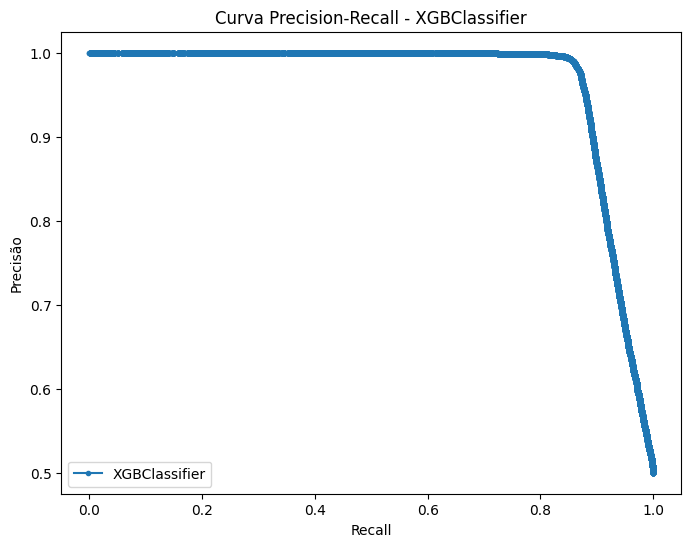


O melhor modelo é: RandomForestClassifier com AUC-ROC de 0.9579202878220188 no conjunto de teste
Melhores hiperparâmetros: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}


In [32]:
# Call the function to compare models
compare_models(X_train, y_train, X_test, y_test)

# ***14. Analyzing the Best Model***


Classification report for the best model (RandomForestClassifier):
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18082
           1       1.00      0.87      0.93     18082

    accuracy                           0.93     36164
   macro avg       0.94      0.93      0.93     36164
weighted avg       0.94      0.93      0.93     36164



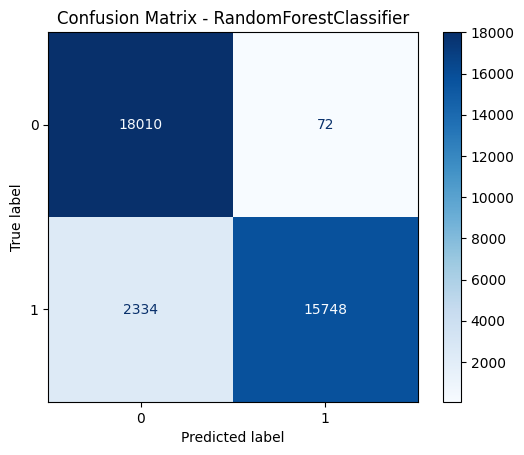

In [35]:
# Display the classification report for the best model
print(f"\nClassification report for the best model ({best_model_name}):")
y_proba_best = best_model.predict_proba(X_test)[:, 1]
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

Adjusted threshold: 0.5
Adjusted Precision: 0.9943224829674489
Adjusted Recall: 0.8716956088928216
Adjusted F1-Score: 0.9289797842871457

Adjusted threshold: 0.4
Adjusted Precision: 0.9766089033127181
Adjusted Recall: 0.882037385244995
Adjusted F1-Score: 0.9269171534013309

Adjusted threshold: 0.3
Adjusted Precision: 0.9089190391459074
Adjusted Recall: 0.9039929211370423
Adjusted F1-Score: 0.9064492874175123



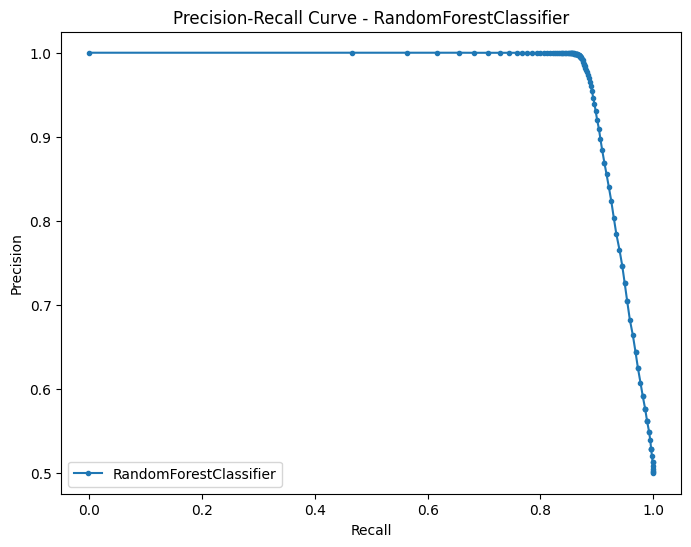

In [36]:
# Adjust the decision threshold for the best model
thresholds = [0.5, 0.4, 0.3]
for threshold in thresholds:
    y_pred_adjusted = (y_proba_best >= threshold).astype(int)
    precision_adj = precision_score(y_test, y_pred_adjusted)
    recall_adj = recall_score(y_test, y_pred_adjusted)
    f1_adj = f1_score(y_test, y_pred_adjusted)
    print(f"Adjusted threshold: {threshold}")
    print(f"Adjusted Precision: {precision_adj}")
    print(f"Adjusted Recall: {recall_adj}")
    print(f"Adjusted F1-Score: {f1_adj}\n")

# Plot the Precision-Recall Curve for the best model
precision_curve, recall_curve, thresholds_curve = precision_recall_curve(y_test, y_proba_best)
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, marker='.', label=best_model_name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve - {best_model_name}')
plt.legend()
plt.show()



Top 10 most important features:
                                               Feature  Importance
2                                   num_lab_procedures    0.044317
4                                      num_medications    0.039998
60                                          insulin_No    0.031597
1                                     time_in_hospital    0.031038
0                                                  age    0.028616
115  diag_3_Endocrine, Nutritional And Metabolic Di...    0.028246
61                                      insulin_Steady    0.025795
108          diag_3_Diseases of the Circulatory System    0.025063
71                                     diabetesMed_Yes    0.024803
8                                     number_diagnoses    0.023075


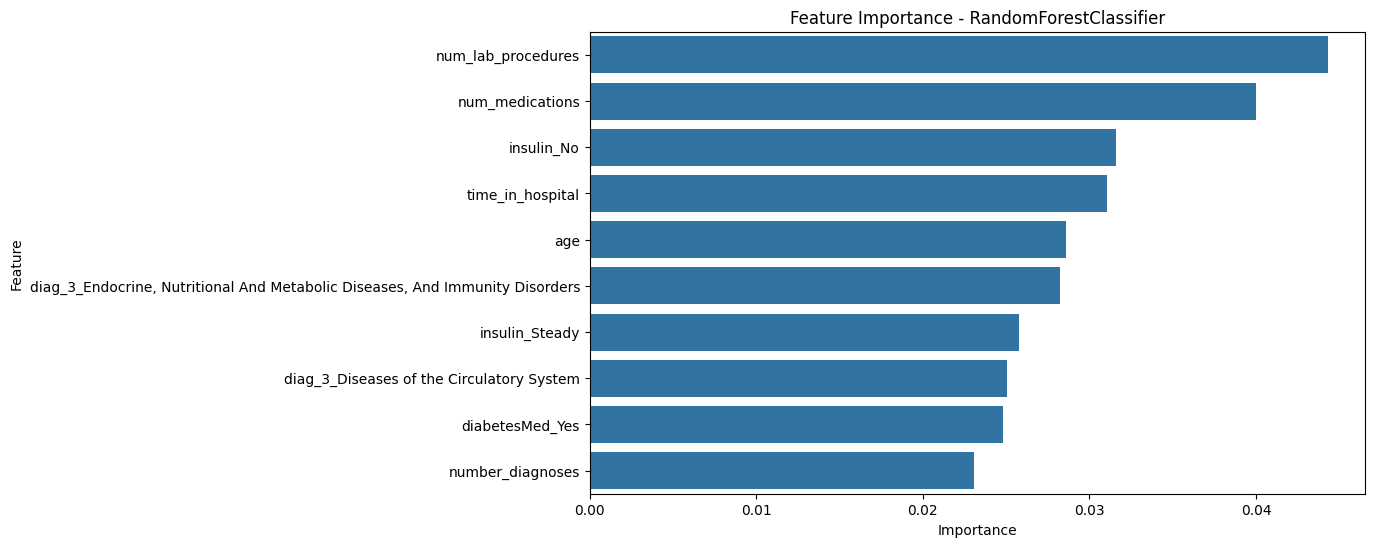

In [37]:
# Feature Importance Analysis (if applicable)
if hasattr(best_model, 'feature_importances_'):
    # Get feature importances
    importances = best_model.feature_importances_
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

    # Sort by importance
    feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

    # Display the top 10 most important features
    print("\nTop 10 most important features:")
    print(feature_importance_df.head(10))

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
    plt.title(f'Feature Importance - {best_model_name}')
    plt.show()